In [1]:
import torch
import torch.nn as nn
import os
import cv2
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')
from torchvision import models
from torchvision import transforms
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [51]:
if(os.path.split(os.getcwd())[1] == "classify-to-learn"):
    os.chdir("..")
print("Current Working Directory: {}".format(os.path.split(os.getcwd())[1]))

cuda = False

Current Working Directory: progettoVIPM


In [3]:
from utils.loadersAndEnums import datasets
from utils.loadersAndEnums import networks
from utils.loadersAndEnums import ImageDataset
from utils.v2 import ExtendedEncoder, Encoder

In [4]:
from utils.loadersAndEnums import datasets, ImageDataset
from torch.utils.data import DataLoader, ConcatDataset, random_split

trainU = ImageDataset(dataset=datasets.TRAINING_UNLABELED,network_input_size=224, cuda=cuda)
unlabeled = DataLoader(trainU,128,True)

In [5]:

device = torch.device('cpu')
#PATH = "Storage\models\AutoEncoderModelV2.pth"
PATH = 'Storage\models\\finetunedResNet50.pth'

if cuda:
    model = torch.load(PATH)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
else:    
    model = torch.load(PATH, map_location=torch.device('cpu') )


In [35]:
all_preds = []
all_out = []
i=0
model.eval()
with torch.no_grad():
    for inputs,labels in tqdm(unlabeled):
        labels = [int(label) for label in labels]
        inputs, labels = inputs.to(device), torch.tensor(labels, dtype=torch.long).to(device)
        outputs = model(inputs)
        print('outputs: ', outputs)
        print('outputs: ', outputs.shape)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_out.extend(outputs.cpu().numpy())
        if i==0: break
        
all_preds = np.array(all_preds)
all_out = np.array(all_out)


  0%|          | 0/887 [00:10<?, ?it/s]

outputs:  tensor([[-0.2845, -1.6087, -1.2574,  ..., -3.8682, -2.8175, -1.7921],
        [-4.2184, -5.6008, -5.7901,  ..., -5.3311, -4.2365, -3.3387],
        [-4.5375, -3.7857, -2.9452,  ..., -1.5218, -3.7405, -3.6221],
        ...,
        [-3.3254, -3.8764, -2.7400,  ..., -3.6419, -1.5419,  0.0359],
        [-0.4783, -2.0082, -0.3937,  ..., -3.4531, -2.9221, -3.3760],
        [-2.5047, -3.3806, -1.8927,  ..., -4.6977, -3.2526, -4.8548]])
outputs:  torch.Size([128, 251])


In [47]:
all_preds.tofile('all_preds.dat')

In [48]:
all_out.tofile('all_out.dat')

In [73]:
all_outfromfile = np.fromfile('all_out.dat', dtype=np.float32)
print('all_outfromfile.shape: ', all_outfromfile.shape)
print('all_outfromfile: ', all_outfromfile)

all_predsfromfile = np.fromfile('all_preds.dat',dtype=int)
print('all_predsfromfile: ', all_predsfromfile)

all_outfromfile.shape:  (28477205,)
all_outfromfile:  [-2.917633   -2.5176225  -1.230884   ... -1.0266062  -0.88828135
 -1.6857829 ]
all_predsfromfile:  [ 44   0 175 ...   0 145   0]


most_proba:  44
prob:  -0.28291413
most_proba:  175
prob:  -0.26829997
most_proba:  181
prob:  -0.55091774
most_proba:  68
prob:  -1.2470611
most_proba:  178
prob:  -0.43512848
most_proba:  122
prob:  -0.72520155
most_proba:  175
prob:  -0.36486483
most_proba:  203
prob:  -0.94554013
most_proba:  34
prob:  -0.407143
most_proba:  190
prob:  -1.370353
most_proba:  142
prob:  -2.209237
most_proba:  88
prob:  -2.3797967
most_proba:  161
prob:  -0.82471335
most_proba:  114
prob:  -1.6934919
most_proba:  23
prob:  -0.8525305
most_proba:  117
prob:  -0.16679107
most_proba:  63
prob:  -1.1487354
most_proba:  241
prob:  -0.98631924
most_proba:  175
prob:  -0.48885325
most_proba:  20
prob:  -0.3629763
most_proba:  114
prob:  -0.46017534
most_proba:  32
prob:  -0.7936949
most_proba:  224
prob:  -1.1922054
most_proba:  36
prob:  -0.72961295
most_proba:  27
prob:  -1.2016762
most_proba:  99
prob:  -0.7114279
most_proba:  69
prob:  -0.6315767
most_proba:  23
prob:  -1.6883996
most_proba:  44
prob:  

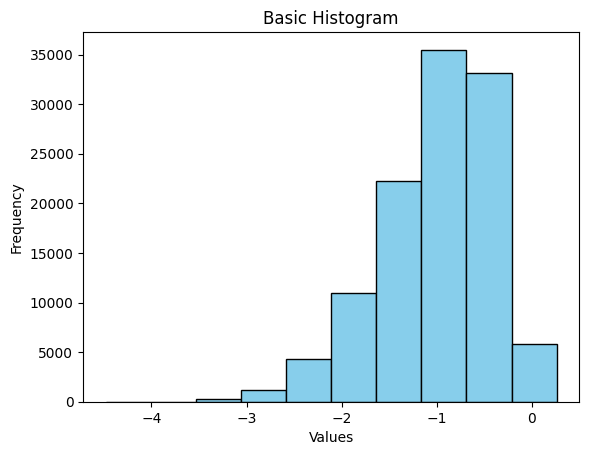

In [ ]:
probs=[]
for i in range(0, len(all_outfromfile), 251):
    out_proba_of_one_pic=all_outfromfile[i:i+251]
    most_proba = np.argmax(out_proba_of_one_pic)
    prob = all_outfromfile[i+most_proba]
    prob_norm = prob/np.mean(out_proba_of_one_pic)
    probs.append(prob_norm)
    print('most_proba: ', most_proba)
    print('prob: ', prob_norm)
print("variance: ", np.var(probs))

import matplotlib.pyplot as plt
import numpy as np
plt.hist(probs, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')
plt.show()